<a href="https://colab.research.google.com/github/Chaitanyaa/Visualizations/blob/master/Visualizationeasyref.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Quick reference - Plots

In [0]:
#1 Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
#2. Get the files
#make sure you upload all your data files to your Google drive and change share->Advanced->change->anyone with the link can view
downloaded = drive.CreateFile({'id':'1v3vkEvwN4f3iQJGRYPtg3IG0Jxmo22_J'}) # replace the id with id of file you want to access
downloaded.GetContentFile('Music Sales.csv')
downloaded = drive.CreateFile({'id':'1FZc9Vrdd9JfXqKr74hK77vofvhsarPC2'}) # replace the id with id of file you want to access
downloaded.GetContentFile('iris.csv')
downloaded = drive.CreateFile({'id':'1bjDsFTAHeBxj61FaN20Z8Al6HNzQzLHN'}) # replace the id with id of file you want to access
downloaded.GetContentFile('winemag-data-130k-v2.csv')

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import itertools
import squarify
#!pip install squarify
df = pd.read_csv('Music Sales.csv', index_col=None)
iris = pd.read_csv('iris.csv', names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])
wine_reviews = pd.read_csv('winemag-data-130k-v2.csv', index_col=0)

###Scatter Plot

Text(0, 0.5, 'sepal_width')

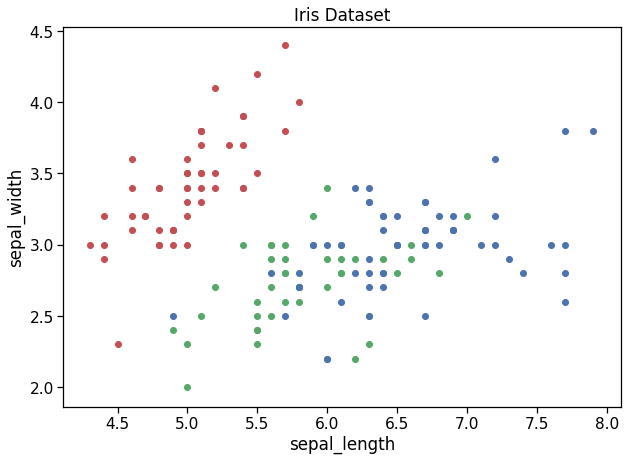

In [62]:
colors = {'Iris-setosa':'r', 'Iris-versicolor':'g', 'Iris-virginica':'b'}
fig, ax = plt.subplots()
for i in range(len(iris['sepal_length'])):
    ax.scatter(iris['sepal_length'][i], iris['sepal_width'][i],color=colors[iris['class'][i]])
ax.set_title('Iris Dataset')
ax.set_xlabel('sepal_length')
ax.set_ylabel('sepal_width')

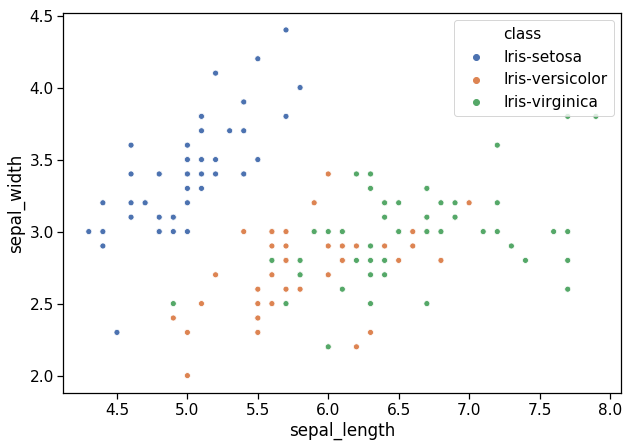

In [59]:
sns.scatterplot(x='sepal_length', y='sepal_width', hue='class', data=iris)

### Line Chart

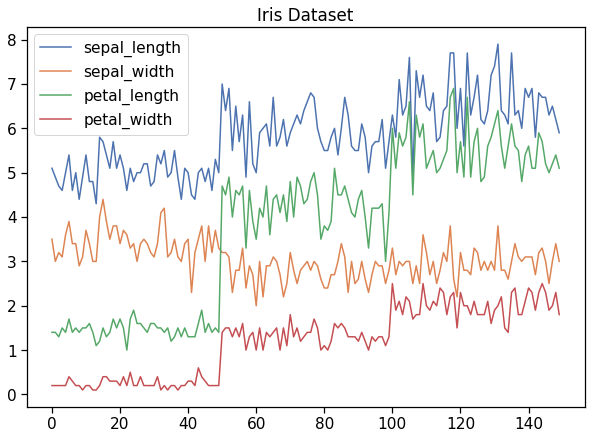

In [63]:
columns = iris.columns.drop(['class'])
x_data = range(0, iris.shape[0])
fig, ax = plt.subplots()
for column in columns:
    ax.plot(x_data, iris[column])
ax.set_title('Iris Dataset')
ax.legend()

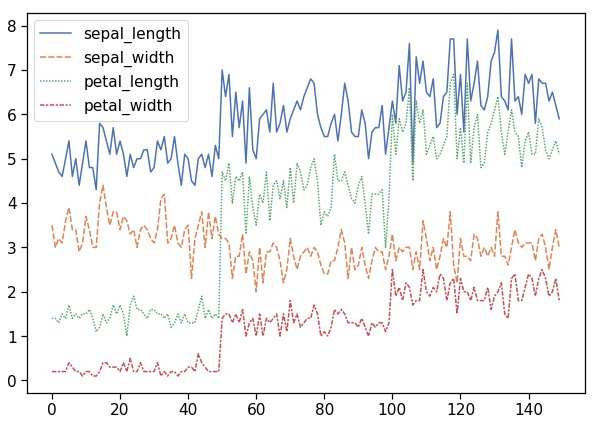

In [60]:
#iris.drop(['class'], axis=1).plot.line(title='Iris Dataset')
sns.lineplot(data=iris.drop(['class'], axis=1))

###Histogram

Text(0, 0.5, 'Frequency')

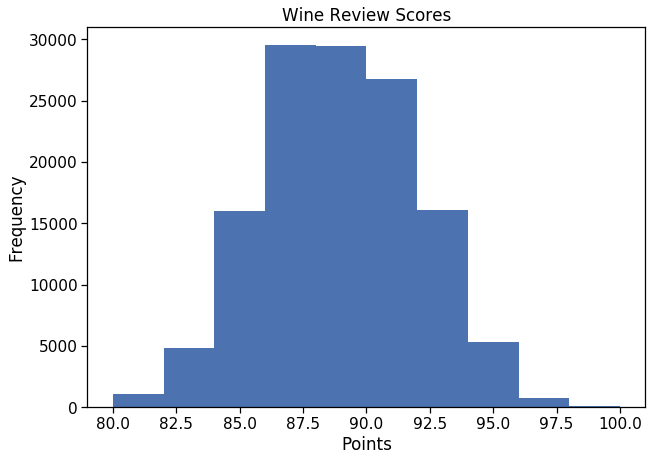

In [64]:
fig, ax = plt.subplots()
ax.hist(wine_reviews['points'])
ax.set_title('Wine Review Scores')
ax.set_xlabel('Points')
ax.set_ylabel('Frequency')

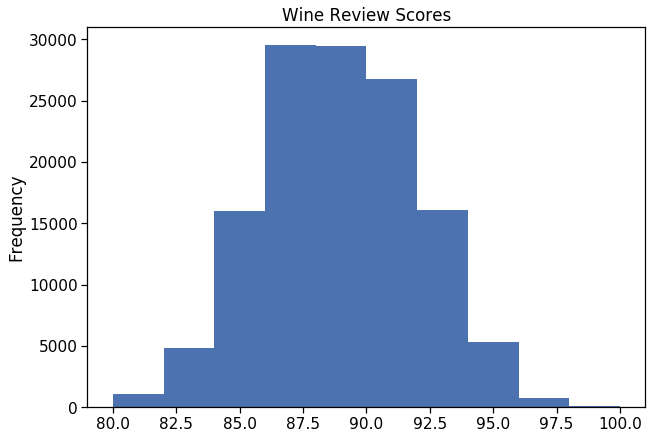

In [55]:
wine_reviews['points'].plot.hist(title='Wine Review Scores')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f498403cb38>,
      dtype=object)

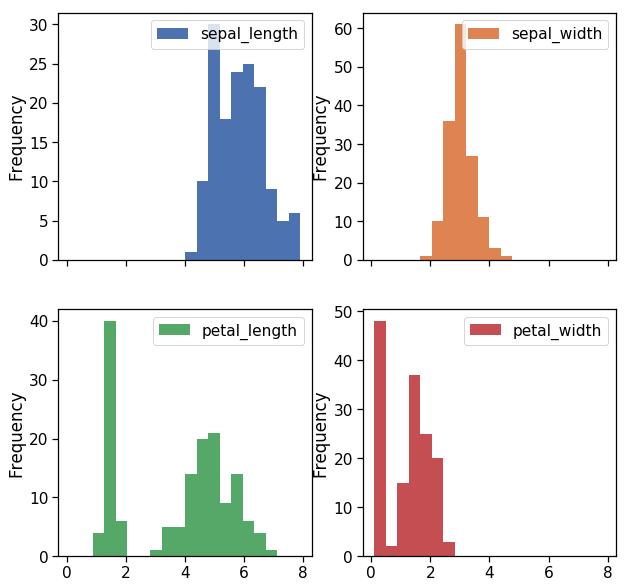

In [43]:
iris.plot.hist(subplots=True, layout=(2,2), figsize=(10, 10), bins=20)

###Bar Chart

Text(0, 0.5, 'Frequency')

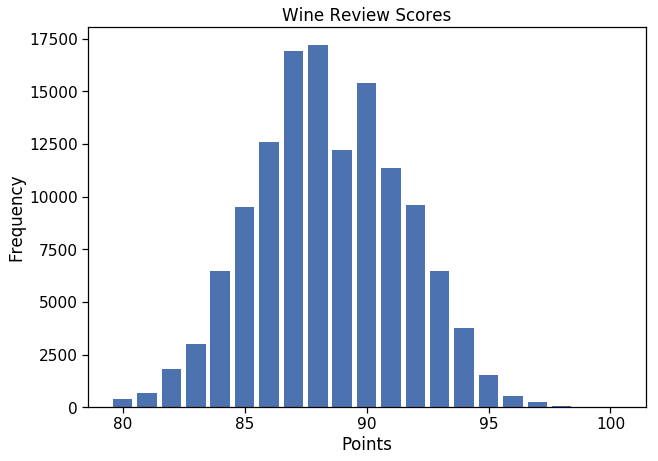

In [65]:
fig, ax = plt.subplots()
data = wine_reviews['points'].value_counts()
points = data.index
frequency = data.values
ax.bar(points, frequency)
ax.set_title('Wine Review Scores')
ax.set_xlabel('Points')
ax.set_ylabel('Frequency')

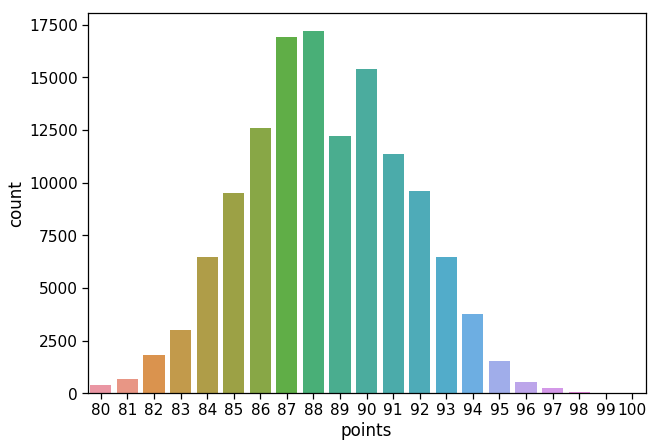

In [57]:
sns.countplot(wine_reviews['points'])

###Boxplot

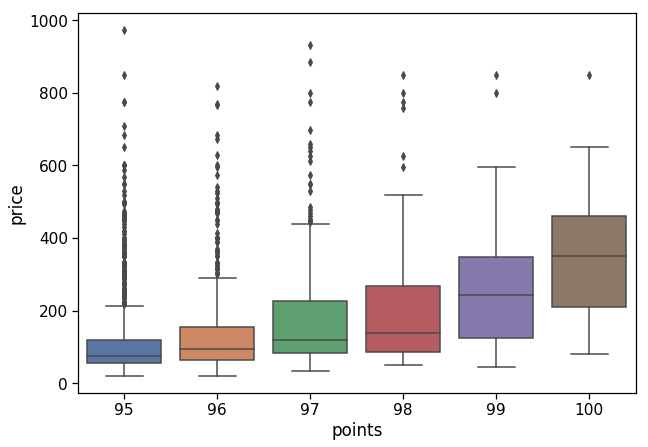

In [45]:
df = wine_reviews[(wine_reviews['points']>=95) & (wine_reviews['price']<1000)]
sns.boxplot('points', 'price', data=df)

###PieChart

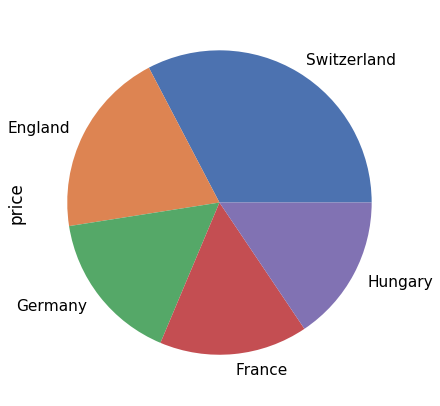

In [46]:
wine_reviews.groupby("country").price.mean().sort_values(ascending=False)[:5].plot.pie()

###Heatmap

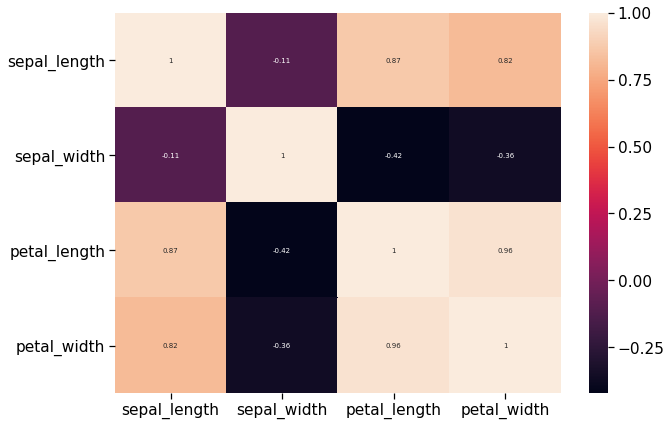

In [50]:
sns.heatmap(iris.corr(), annot=True, ax=ax)

###Facetgrid

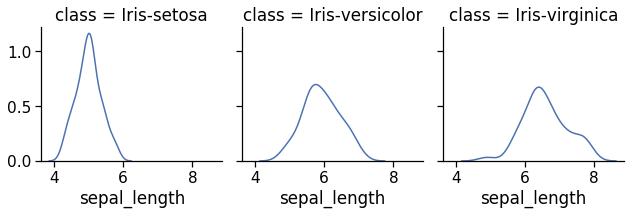

In [51]:
g = sns.FacetGrid(iris, col='class')
g = g.map(sns.kdeplot, 'sepal_length')

###Pairplot

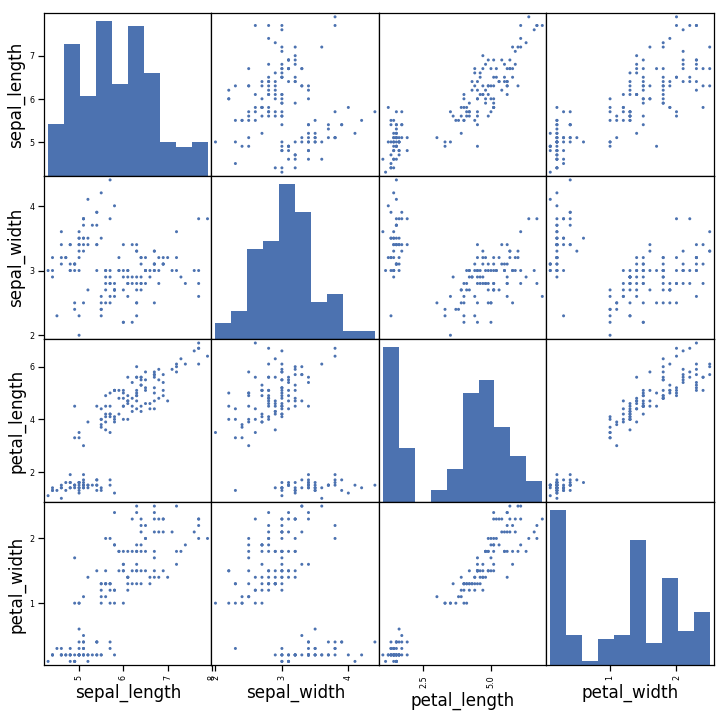

In [53]:
#sns.pairplot(iris)
from pandas.plotting import scatter_matrix

fig, ax = plt.subplots(figsize=(12,12))
scatter_matrix(iris, alpha=1, ax=ax);

###Most popular genre in Europe and Asia.

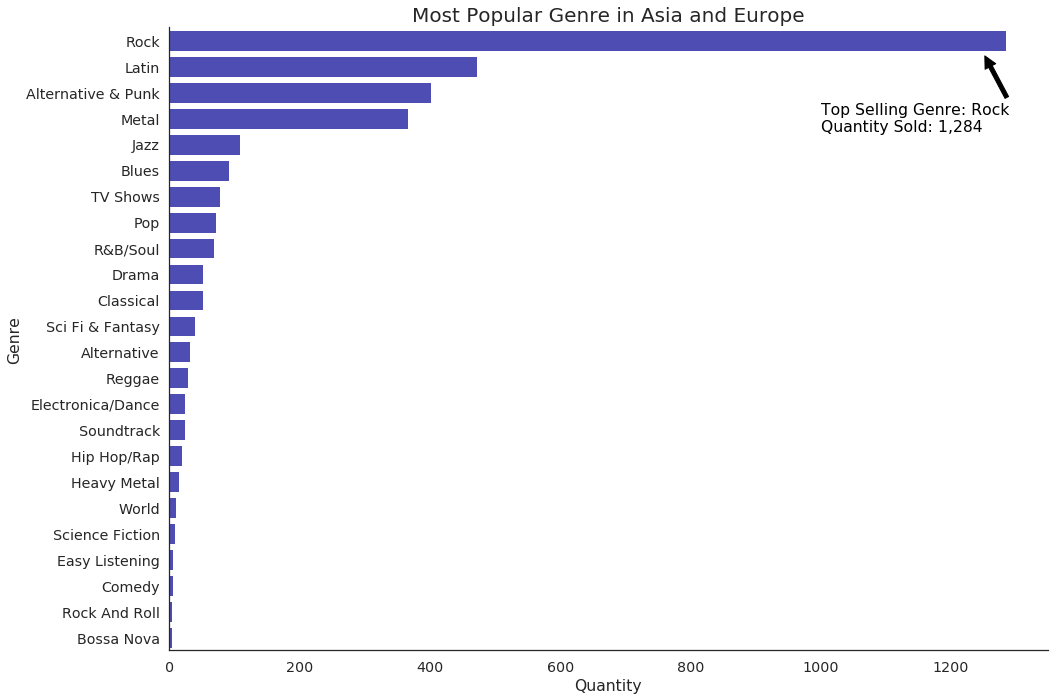

In [8]:
df_EA=df[df['Region'].isin(['Europe', 'Asia'])].copy()
df_genre = df_EA.groupby(['Genre'])['Quantity'].sum().reset_index()
df_genre.sort_values(by=['Quantity'], ascending=False, inplace=True)
with sns.axes_style("white"):
  sns.set_context("notebook", font_scale=1.3)
  fig, ax = plt.subplots(figsize=(15,10))
  ax = fig.gca()
  sns.barplot(y='Genre', x='Quantity', data=df_genre, ax=ax,color='blue',saturation=0.4)
ax.set_title('Most Popular Genre in Asia and Europe', size=20)
sns.despine()
ax.annotate('Top Selling Genre: Rock\nQuantity Sold: 1,284', 
            xy = (1250,0.5), xytext=(1000,3.5), arrowprops=dict(facecolor='black', shrink=0.05))
plt.tight_layout()

###Top 20 Artists in Europe and Asia.

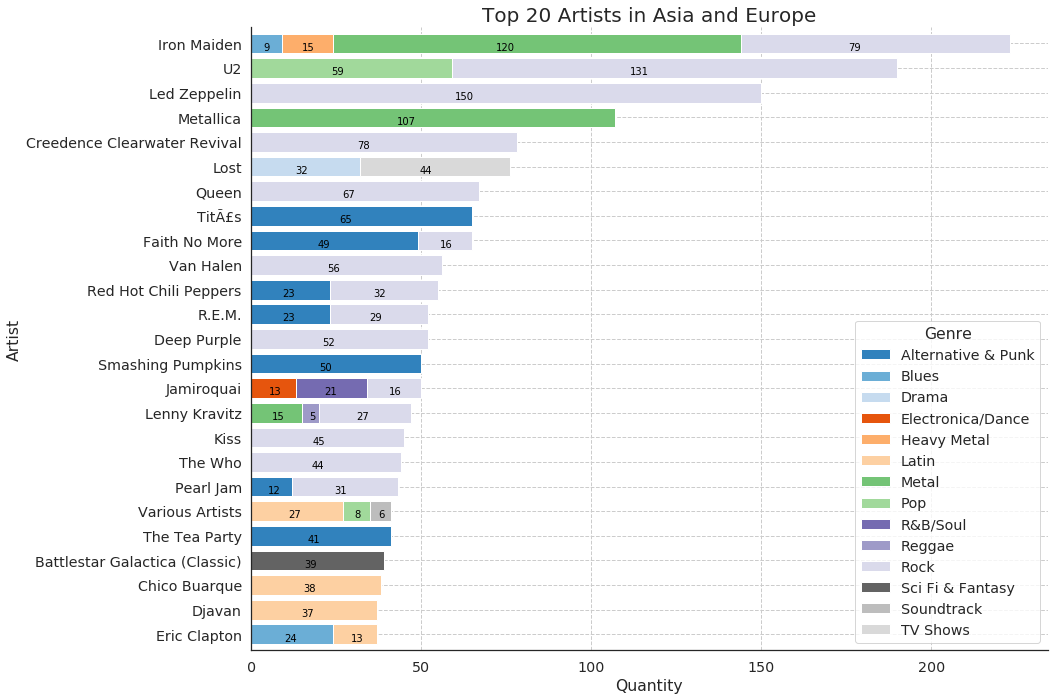

In [10]:
# get the rank of artists by quantity
df_rank = df_EA.groupby(['Artist'])['Quantity'].sum().reset_index()
df_rank['Rank'] = df_rank['Quantity'].rank(method='dense', ascending=False) 

# get the quantity by artists and genre
# append the rank of artists
df_rank_genre = df_EA.groupby(['Artist', 'Genre'])['Quantity'].sum().reset_index()
df_rank_genre=pd.merge(df_rank_genre, df_rank[['Artist', 'Rank']], on='Artist', how='left')
df_rank_genre.sort_values(by='Rank', inplace=True)

# reformat for plotting
df_top20 = df_rank_genre.loc[df_rank_genre['Rank'] <= 20,
                             ['Artist', 'Genre', 'Quantity']].pivot(columns='Genre',
                                                                    index='Artist',
                                                                    values='Quantity')

df_top20['total'] = df_top20.sum(axis=1)
df_top20.sort_values(by=['total'], ascending=[True], inplace=True)
df_top20.drop('total', axis=1, inplace=True)


with sns.axes_style("white"):
  ax = df_top20.plot.barh(stacked=True, width=0.8, figsize=(15, 10), cmap=plt.cm.get_cmap('tab20c'))
  for p in ax.patches:
      width, height = p.get_width(), p.get_height()
      if width > 0:
          ax.annotate(f'{width:.0f}', (p.get_x()+0.40*width,
                                       p.get_y()+.17*height), color='black', fontsize=10)
  plt.title('Top 20 Artists in Asia and Europe', size=20)
  plt.xlabel('Quantity')
  sns.despine()
  plt.grid('on', linestyle='--')
  plt.tight_layout()

###Rock vs. Alternative and Punk vs. Heavy Metal.

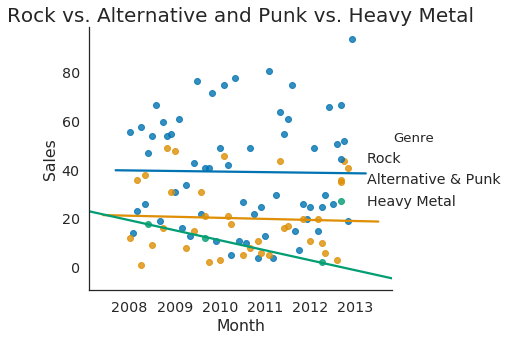

In [11]:

# format date to month
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceDate_year_month'] = pd.to_datetime(df['InvoiceDate']).dt.strftime("%Y-%m")
# subset the data needed for the plot
df_3genres=df[df['Genre'].isin(['Alternative & Punk','Heavy Metal', 'Rock'])]
# get the summary
df_3genres_summary = df_3genres.groupby(['Genre', 'InvoiceDate_year_month'])['Sales'].sum().reset_index()
# set the template
t = pd.date_range('2008-01-01', '2012-12-31', freq='MS')
order=list(np.arange(60))*3

df_3genres_template=pd.DataFrame(list(itertools.product(['Rock','Alternative & Punk','Heavy Metal'], t)), 
                                 columns=['Genre', 'InvoiceDate'])
df_3genres_template['order']=order
df_3genres_template['InvoiceDate_year_month'] = pd.to_datetime(df_3genres_template['InvoiceDate']).dt.strftime("%Y-%m")

# merge the summary with the template
df_3genres_summary = pd.merge(df_3genres_template, df_3genres_summary, 
                               on=['Genre', 'InvoiceDate_year_month'], how='left')

with sns.axes_style("white"):
  plt.rcParams['figure.figsize'] = (10, 10)
  ax=sns.lmplot(x='order', y='Sales', hue='Genre', data=df_3genres_summary, ci=None, palette='colorblind')
  plt.title('Rock vs. Alternative and Punk vs. Heavy Metal', size=20)
  plt.xlabel('Month')
  ax.set(xticks=np.arange(0,71,12), xticklabels=[2008, 2009, 2010, 2011, 2012, 2013])
  plt.tight_layout()
 

###Time series plot for sales in US and Canada

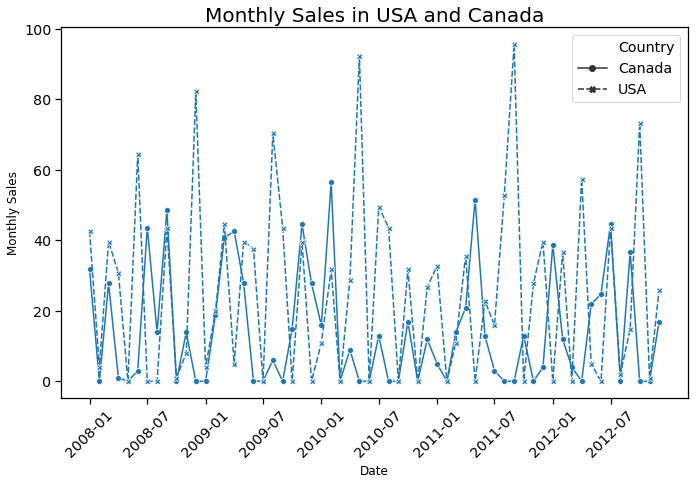

In [14]:
# Convert 'InvoiceDate' to datetime
# Create month variable based on 'InvoiceDate'
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceDate_Month'] = df['InvoiceDate'].astype('datetime64[M]')
# Filter out US and Canada data
df_USA_CAN = df[df['Country'].isin(['USA', 'Canada'])].copy()
df_USA_CAN[['Country', 'InvoiceDate', 'Sales', ]].head()
# Calculate monthly sales in US and Canada
# The monthly sales data is less sparse. But the sales data is not available for every month. For example, Feb in 2008.
monthly_sales = df_USA_CAN.groupby(['Country', 'InvoiceDate_Month']).Sales.sum().reset_index()
monthly_sales.head()
# Assuming there is no data loss during data collection, missing months here mean no sale for the particular months.
# Create a template with all months presented
t = pd.DataFrame(list(itertools.product(['Canada', 'USA'],
                                        pd.date_range('2008-01-01', '2012-12-31', freq='MS'))),
                 columns=['Country', 'InvoiceDate_Month'])
# Impute the sales from missing months as 0
monthly_sales_new = pd.merge(t, monthly_sales, 
                             on=['Country', 'InvoiceDate_Month'], 
                             how='left')
monthly_sales_new.fillna(0, inplace=True)
monthly_sales_new.head()

# Plot monthly sales in US and Canada
plt.rcParams['figure.figsize'] = (10, 7)
ax = sns.lineplot(x='InvoiceDate_Month', y='Sales', data=monthly_sales_new,
                  style='Country', markers=True)
ax.set_title('Monthly Sales in USA and Canada', size=20)
ax.set_xlabel('Date', size=12)
ax.set_ylabel('Monthly Sales', size=12)

# Format the x-axis labels
ax.set_xticks(monthly_sales_new['InvoiceDate_Month'].values[np.arange(0, 60, 6)])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

plt.tight_layout()

###Rock music monthly market share fluctuate in US in 2011 and 2012

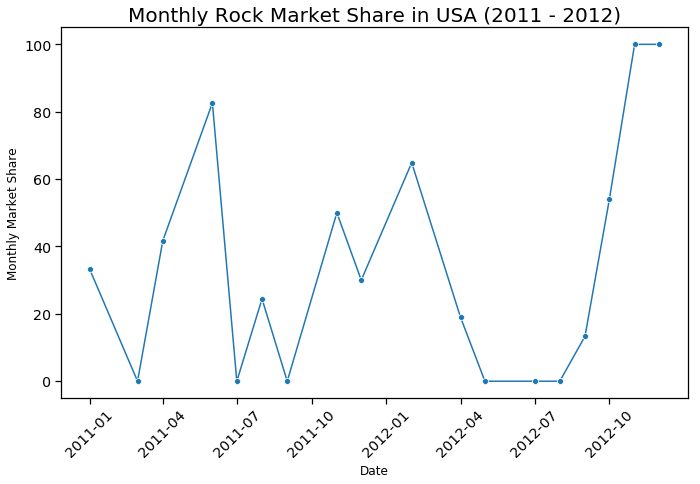

In [17]:
# Filter out US in 2011 and 2012
df_US_2011and2012 = df[(df['Country'] == 'USA') &
                       (df['InvoiceDate'] >= '2011-01-01') &
                       (df['InvoiceDate'] <= '2012-12-31')].copy()

# Calculate total monthly sales of all genre
US_total_sales = df_US_2011and2012.groupby(['InvoiceDate_Month']).Sales.sum().reset_index()
US_total_sales.rename(columns={'Sales': 'Total_Sales'}, inplace=True)

# Calculate total monthly sales of Rock
US_rock_sales = df_US_2011and2012[df_US_2011and2012['Genre'] == 'Rock'].groupby(['InvoiceDate_Month']).Sales.sum().reset_index()
US_rock_sales.rename(columns={'Sales': 'Rock_Sales'}, inplace=True)

# Calculate Rock market share
# Note: In this table, there are months with total sales but not Rock sales.
#       This means there is no rock sales for this particular month, which means 0% market share.
US_rock_mkt_share = pd.merge(US_total_sales, US_rock_sales, 
                             on='InvoiceDate_Month', 
                             how='left')
US_rock_mkt_share.fillna(0, inplace=True)
US_rock_mkt_share['Rock_Market_Share'] = US_rock_mkt_share['Rock_Sales'] * 100 / US_rock_mkt_share['Total_Sales']
US_rock_mkt_share.head()

# Note: In the table above, there are some months completely missing. For example, Feb 2011.
#       This means there is no sale at all for the month, which also means there is no data avaible to estimate market share.
#       So we will add these months to the table and keep them as NA
t2 = pd.DataFrame(pd.date_range('2011-01-01', '2012-12-31', freq='MS'),
                  columns=['InvoiceDate_Month'])
US_rock_mkt_share_new = pd.merge(t2, US_rock_mkt_share,
                                 on='InvoiceDate_Month',
                                 how='left')
US_rock_mkt_share_new.head()

# If we use lineplot as is, when the viewer reads this plot,
# s/he will assume that for months like Feb 2011 have an estimated positive market share.
# In reality, the data is not avaible for the market share estimation.
# Option 1: We could label all the months with zero sales one by one to avoid such confusion.

plt.rcParams['figure.figsize'] = (10, 7)
ax = sns.lineplot(x='InvoiceDate_Month', y='Rock_Market_Share',
                  data=US_rock_mkt_share_new, marker='o')
ax.set_title('Monthly Rock Market Share in USA (2011 - 2012)', size=20)
ax.set_xlabel('Date', size=12)
ax.set_ylabel('Monthly Market Share', size=12)

# Format the x-axis labels
ax.set_xticks(US_rock_mkt_share_new['InvoiceDate_Month'].values[np.arange(0, 24, 3)])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

plt.tight_layout()

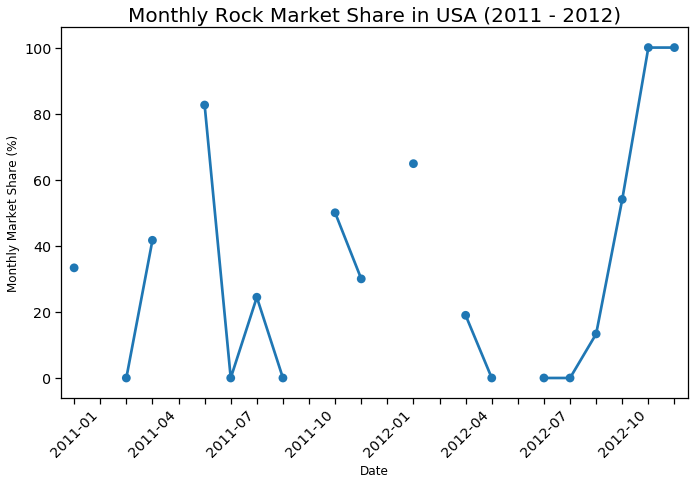

In [18]:
# Option 2: We will use pointplot by not plotting the months without sales.
# Seaborn pointplot is a categorical plot. So I need to modify the format of the date to get it displayed as year and month.
US_rock_mkt_share_new['InvoiceDate_Month_new'] = US_rock_mkt_share_new['InvoiceDate_Month'].dt.strftime("%Y-%m")

plt.rcParams['figure.figsize'] = (10, 7)
ax = sns.pointplot(x='InvoiceDate_Month_new', y='Rock_Market_Share', data=US_rock_mkt_share_new)
ax.set_title('Monthly Rock Market Share in USA (2011 - 2012)', size=20)
ax.set_xlabel('Date', size=12)
ax.set_ylabel('Monthly Market Share (%)', size=12)

# reduce the number of x-axis labels
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 3 == 0:  # keep the beginning month of every quarter
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.xticks(rotation=45)

plt.tight_layout()

###Treemap

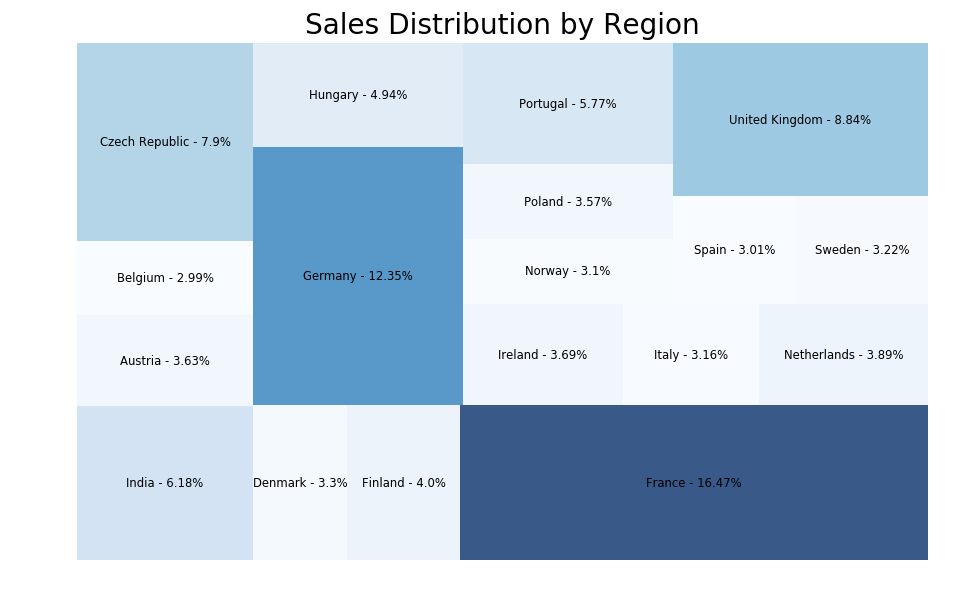

In [30]:
df_EA=df[df['Region'].isin(['Europe', 'Asia'])].copy()
df_EA['RSales'] = df_EA['Quantity']*df_EA['UnitPrice']
temp = df_EA.groupby(['Region','Country']).sum()#.sort_index(ascending=False).sort_values(by='RSales')
import pandas as pd
temp = df_EA.groupby(['Region','Country']).sum().sort_index(level=[0,1],ascending=False)
temp = temp.sort_values(by='RSales',ascending=False).sort_index()
fig, ax = plt.subplots(figsize=(8,5))
plt.tight_layout()
fig.set_dpi(120)
plt.rcParams.update({'font.size': 7})
ax = fig.gca()
ax.set_title('Sales Distribution by Region')
# create a color palette, mapped to these values
my_values = temp[temp.RSales.index.get_level_values(1)!="Asia"]['RSales']
cmap = matplotlib.cm.Blues
mini=min(my_values)
maxi=max(my_values)
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in my_values]
labels=np.array(temp.RSales.index.get_level_values(1))+ " - " +((temp['RSales'].values/3415.35)*100).round(2).astype("str")+"%"
squarify.plot(sizes=temp['RSales'], label=labels,color=colors, alpha=0.8 )
plt.axis('off')
plt.show()

###Swarmplot

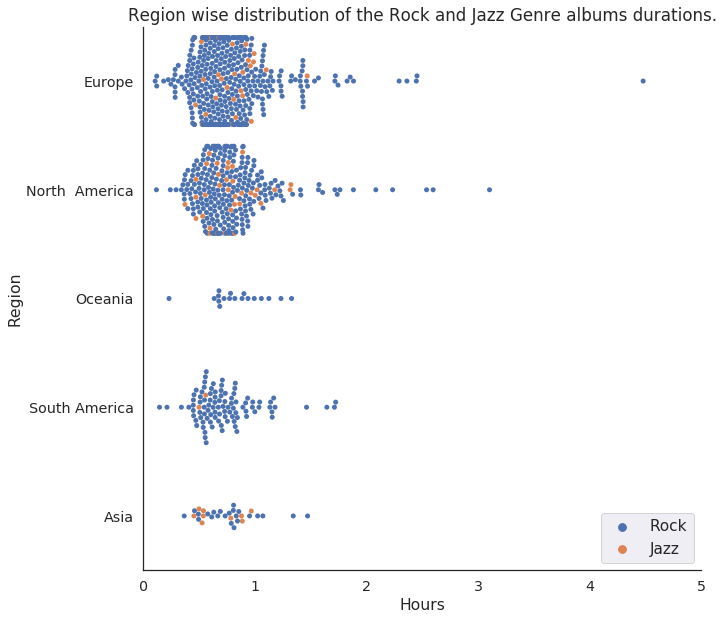

In [25]:
# Region wise distribution of the Rock and Jazz Genre albums durations.
import warnings
warnings.filterwarnings('ignore')
df_own = df[((df['Genre']=='Rock') | (df['Genre']=='Jazz'))]
df_own['hours'] = df_own['Milliseconds']/360000
with sns.axes_style("white"):
  fig = plt.figure(figsize=(10,10))
  ax = fig.gca() 
  sns.set(font_scale=1.4)
  sns.swarmplot(x="hours", y="Region", hue="Genre",ax=ax, data=df_own)
  ax.set_title('Region wise distribution of the Rock and Jazz Genre albums durations.')
  ax.set_xlabel('Hours')
  sns.despine()
  ax.set_ylabel('Region')
  plt.legend(loc='lower right')
  plt.xlim(0, 5)